# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas

import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [3]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [4]:
# Your code here:
fifa.head(5)
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties'],
      dtype='object')

In [5]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,Right,LF,4.0,94.0,88.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,Right,RCM,4.0,80.0,72.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,Right,RS,4.0,86.0,75.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,Right,RCB,3.0,76.0,75.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,Right,GK,3.0,43.0,60.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [6]:
# Your code here:
fifa['ValueNumeric'] = [(float(s.strip('M, €'))*1000) if 'M' in s else float(s.strip('K, €')) for s in fifa.Value] 

#ffa['ValueNumeric'] = fifa['Value'].str.replace('€', '').str.replace('M', '').str.replace('K', '')
#ifa['ValueNumeric']=fifa['ValueNumeric'].astype(float)

#fifa.ValueNumeric.replace('M', '', regex=True)
#fifa['ValueNumeric'] = fifa['ValueNumeric'].map(lambda x: str(x)[:-1])
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,Right,LF,4.0,...,88.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,93000.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,Right,RCM,4.0,...,72.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,67000.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,Right,RS,4.0,...,75.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,80000.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,Right,RCB,3.0,...,75.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,51000.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,Right,GK,3.0,...,60.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,68000.0


In [7]:
fifa.rename(columns={'Preferred Foot':'Preffoot'}, inplace=True)

In [8]:
fifa



,Name,Age,Nationality,Overall,Potential,Club,Value,Preffoot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,Right,LF,4.0,...,88.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,93000.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,Right,RCM,4.0,...,72.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,67000.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,Right,RS,4.0,...,75.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,80000.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,Right,RCB,3.0,...,75.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,51000.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,Right,GK,3.0,...,60.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,68000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [9]:
from scipy.stats import f_oneway
fifa['position'] = fifa.groupby('Position').cumcount()
fifa['preferred_foot'] = fifa.groupby('Preffoot').cumcount()
fifa_pivot = fifa.pivot_table(index='Position', columns='Preffoot', values='ValueNumeric')
fifa_pivot
f_oneway(fifa_pivot.Left,fifa_pivot.Right)

F_onewayResult(statistic=1.347879574966893, pvalue=0.2509511615179838)

In [10]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
#model = ols('ValueNumeric ~ C(Position) + C(Preffoot)', data=fifa).fit()
model = ols('ValueNumeric ~ C(Position + Preffoot)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table



,sum_sq,df,F,PR(>F)
C(Position + Preffoot),2.188308e+10,53.0,13.638317,1.098337e-115
Residual,5.477500e+11,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# Your conclusions here:
#Reject the hypothesis 

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [11]:
# Your code here:
model1 = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()

anova_table = sm.stats.anova_lm(model1, typ=2)
anova_table



,sum_sq,df,F,PR(>F)
C(Nationality),3.281224e+10,163.0,6.762478,4.840477e-134
Residual,5.370951e+11,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
#Reject the hypothesis

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [13]:
# Your code here:
fifa.isnull().any()


Name              False
Age               False
Nationality       False
Overall           False
Potential         False
Club               True
Value             False
Preffoot           True
Position           True
Weak Foot          True
Acceleration       True
SprintSpeed        True
Stamina            True
Strength           True
LongShots          True
Aggression         True
Interceptions      True
Positioning        True
Vision             True
Penalties          True
ValueNumeric      False
position          False
preferred_foot    False
dtype: bool

In [14]:
fifa_no_missing = fifa.dropna()
fifa_no_missing

,Name,Age,Nationality,Overall,Potential,Club,Value,Preffoot,Position,Weak Foot,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric,position,preferred_foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500.0,0,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000.0,0,0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500.0,0,1
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000.0,0,2
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000.0,0,3
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,Right,LF,4.0,...,66.0,80.0,54.0,41.0,87.0,89.0,86.0,93000.0,0,4
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,Right,RCM,4.0,...,58.0,82.0,62.0,83.0,79.0,92.0,82.0,67000.0,1,5
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,Right,RS,4.0,...,83.0,85.0,87.0,41.0,92.0,84.0,85.0,80000.0,0,6
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,Right,RCB,3.0,...,83.0,59.0,88.0,90.0,60.0,63.0,75.0,51000.0,0,7
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,Right,GK,3.0,...,78.0,12.0,34.0,19.0,11.0,70.0,11.0,68000.0,1,8


In [15]:
fifa_no_missing.isnull().any()

Name              False
Age               False
Nationality       False
Overall           False
Potential         False
Club              False
Value             False
Preffoot          False
Position          False
Weak Foot         False
Acceleration      False
SprintSpeed       False
Stamina           False
Strength          False
LongShots         False
Aggression        False
Interceptions     False
Positioning       False
Vision            False
Penalties         False
ValueNumeric      False
position          False
preferred_foot    False
dtype: bool

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [17]:
# Your code here:

X = sm.add_constant(fifa_no_missing[['Stamina', 'SprintSpeed']]) # adding a constant
Y = fifa_no_missing.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 


                          

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [18]:
# Your conclusions here:
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Thu, 11 Jul 2019   Prob (F-statistic):          8.04e-193
Time:                        18:51:32   Log-Likelihood:            -1.7972e+05
No. Observations:               17918   AIC:                         3.595e+05
Df Residuals:                   17915   BIC:                         3.595e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3070.0269    196.798    -15.600      

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [20]:
# Your code here:


X = sm.add_constant(fifa_no_missing.Potential) 
Y = fifa_no_missing.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:52:48   Log-Likelihood:            -1.7650e+05
No. Observations:               17918   AIC:                         3.530e+05
Df Residuals:                   17916   BIC:                         3.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+04    399.569    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:

#Both tests indicate that the specified variables should be rejected. The F-test scores are very high, and their associated
#P-scores are very low. The R-squared value for potential is .33, which is a moderate amount, while the R-squared for 
#Stamina and SprintSpeed is .048, which is very low. 

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

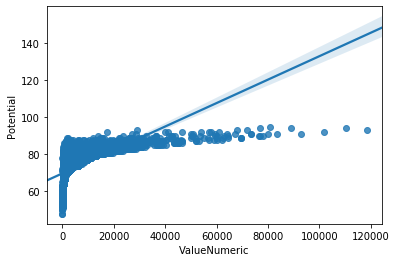

In [23]:
# Your code here:
import seaborn as sns
import matplotlib.pyplot as plt  

sns.regplot(x="ValueNumeric", y="Potential", data=fifa_no_missing)

In [ ]:
#there is a linear relationship above the 80 threshold. Perhaps the data would be better served if only Potential
#values above 50 or 60 were considered. 